<a href="https://colab.research.google.com/github/Madhushri1216/Gold-Price-Prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter("ignore")

In [11]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [12]:
#print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [13]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [15]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [16]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [17]:
# checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [18]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [21]:
print(gold_data.dtypes)

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object


In [23]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'], errors='coerce')

In [24]:
correlation = gold_data.drop(columns=['Date']).corr()
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

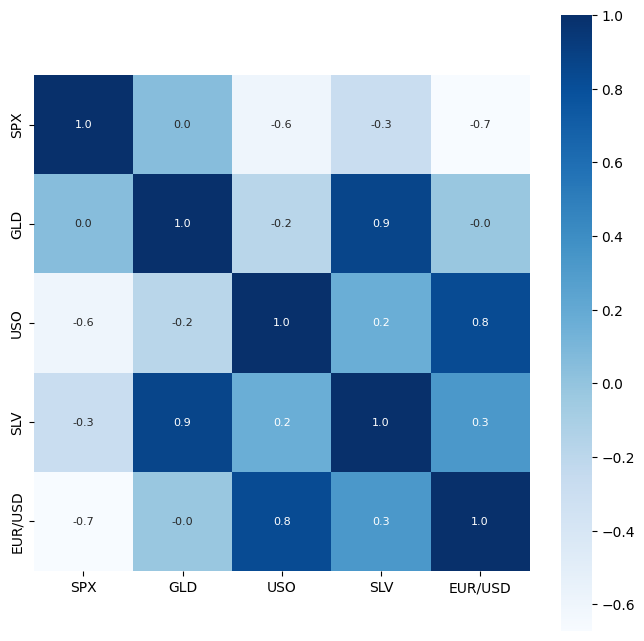

In [25]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [26]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Density'>

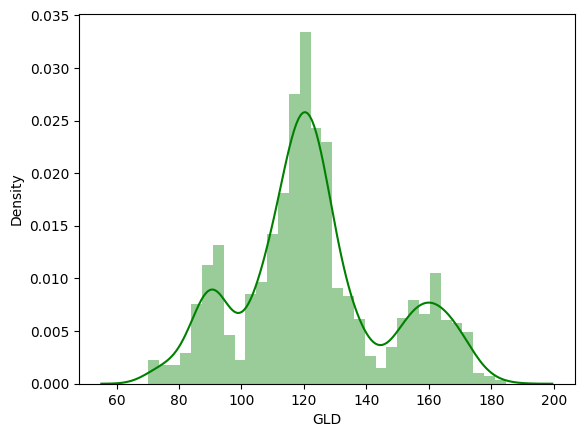

In [27]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [28]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [29]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [31]:
regressor = RandomForestRegressor (n_estimators=100)

In [32]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [34]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.41869918  82.33099954 116.30119997 127.5644006  120.7403013
 154.61089779 150.05019847 126.0172005  117.50049887 125.93580109
 116.51940134 171.88220076 142.1359984  167.81759838 115.07430017
 117.72990043 139.13400346 170.10690085 159.77550344 160.12619939
 155.1785999  125.71790038 176.03090008 157.29980349 125.1856005
  93.84019987  77.6910001  120.55530001 119.15479953 167.53969999
  88.2965008  125.12960003  91.42030089 117.83130011 120.98639903
 135.99720146 115.63250096 115.37870037 147.03919907 107.16950127
 104.67840244  87.24969801 126.51460068 117.84159985 155.45439914
 119.59280022 108.34819997 108.04219812  93.20510058 127.15559794
  75.12810007 113.58559935 121.45089999 111.286499   118.87959885
 120.71669957 159.00639931 168.76060104 147.13219649  85.85329874
  94.48630021  86.67789852  90.62360035 118.87720078 126.43740095
 127.58869983 170.03720008 122.33339914 117.44439888  98.31840008
 167.90080113 143.26689855 131.65870236 121.27010178 121.40419955
 119.6937003

In [35]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction )
print("R squared error : " , error_score)

R squared error :  0.9899922786870263


In [36]:
model1 = LinearRegression()
model1

LinearRegression()

In [37]:
model1.fit(X_train, Y_train)

LinearRegression()

In [39]:
y_pred = model1.predict(X_test)
y_pred

array([159.45290968,  81.50858067, 113.4868037 , 128.55153817,
       126.20403783, 141.31818338, 165.49416492, 124.44197659,
       113.95389904, 122.9965895 , 113.95492464, 174.89529849,
       132.66890174, 159.24793304, 118.8791679 , 122.14315717,
       150.37153054, 161.27175405, 152.2792036 , 162.19946709,
       145.88372183, 118.07669395, 180.21729122, 178.13331554,
       123.51701986,  98.82914322,  76.63486248, 119.38435511,
       113.85027665, 159.25706609,  93.76037617, 120.05334649,
        88.61086583, 114.28801659, 112.77954274, 144.19518102,
       118.78252489, 115.87334354, 144.06409553, 113.81864246,
       100.49676727,  89.42842238, 120.36720699, 110.47635305,
       146.4894628 , 119.30321261, 110.99311348, 111.3386287 ,
        96.48139076, 123.40842816,  79.51413425, 115.36111603,
       121.78896764, 114.55367722, 120.9074622 , 117.10612464,
       152.31198525, 182.7735091 , 196.73570503,  91.06670951,
       101.92097594,  87.48443506,  94.33158785, 119.17

In [40]:
comp = pd.DataFrame({'actual':Y_test,'pridict':y_pred})
comp['error']=comp['actual']-comp['pridict']
comp

,actual,pridict,error
903,168.020004,159.452910,8.567094
129,81.230003,81.508581,-0.278578
1787,112.320000,113.486804,-1.166804
1913,127.589996,128.551538,-0.961542
2048,119.620003,126.204038,-6.584035
...,...,...,...
923,166.380005,159.866392,6.513613
1693,106.379997,111.240450,-4.860453
2054,122.239998,126.454208,-4.214210
658,133.830002,144.935055,-11.105053


In [41]:
Y_test = list(Y_test)

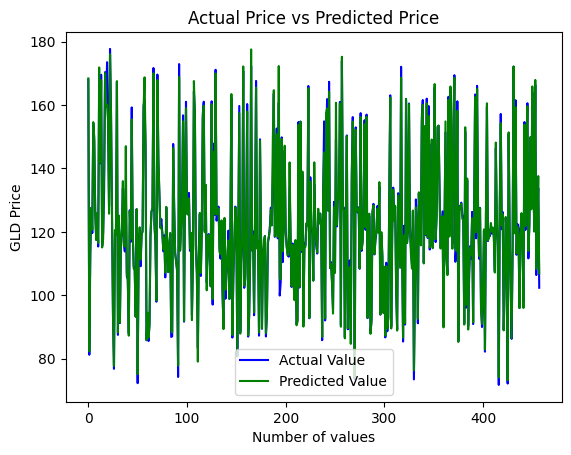

In [42]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction , color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price' )
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()